**Model deployment using tensorflow serving**



In [0]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [0]:
import tensorflow as tf
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import tempfile
from tensorflow import keras

1) Import the datasets

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# Reshape the dimensions of the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train.shape

(60000, 28, 28, 1)

2) Visualize the data

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

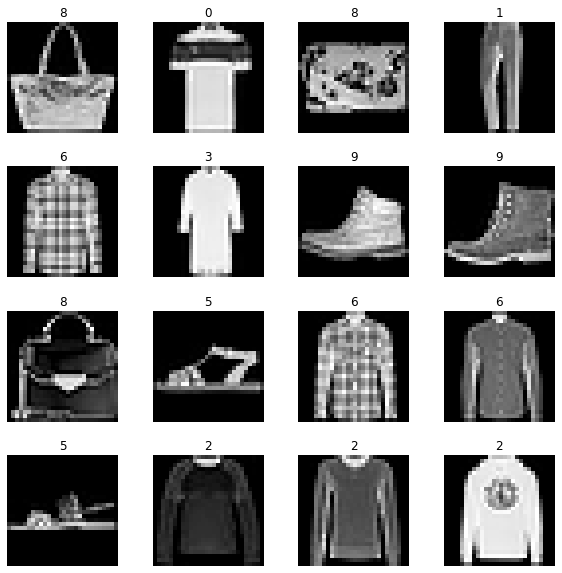

In [8]:
w_grid = 4
l_grid = 4

fig, axes = plt.subplots(l_grid, w_grid, figsize = (10, 10))
axes = axes.ravel()

n_training = len(x_train)

for i in np.arange(0, l_grid * w_grid):

    index = np.random.randint(0, n_training)
    axes[i].imshow(x_train[index].reshape(28, 28), cmap = 'gray')
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.3)

3) Model definition

In [9]:
cnn = keras.models.Sequential([
          keras.layers.Conv2D(32, (3, 3), activation = 'selu', 
                              input_shape = (28, 28, 1)),
          keras.layers.MaxPooling2D(2, 2),
          keras.layers.BatchNormalization(),
          keras.layers.Dropout(0.3),
          keras.layers.Conv2D(64, (3, 3), activation = 'selu'),

          keras.layers.Flatten(),
          keras.layers.Dense(64, activation = 'selu'),
          keras.layers.Dropout(0.3),
          keras.layers.Dense(10, activation = 'softmax')
])

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_v2 (Batc (None, 13, 13, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

5) Model training

In [0]:
epochs = 20

cnn.compile(optimizer = 'Nadam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
cnn.fit(x_train, y_train, epochs = epochs)

test_loss, test_acc = cnn.evaluate(x_test, y_test)
print('\nTest accuracy: {}'.format(test_acc))

Epoch 1/20
60000/60000 [==============================] - 21s 351us/sample - loss: 0.5630 - accuracy: 0.8180
Epoch 2/20
60000/60000 [==============================] - 14s 240us/sample - loss: 0.3751 - accuracy: 0.8651
Epoch 3/20
60000/60000 [==============================] - 15s 246us/sample - loss: 0.3417 - accuracy: 0.8771
Epoch 4/20
60000/60000 [==============================] - 14s 235us/sample - loss: 0.3217 - accuracy: 0.8833
Epoch 5/20
60000/60000 [==============================] - 14s 237us/sample - loss: 0.3047 - accuracy: 0.8897
Epoch 6/20
60000/60000 [==============================] - 14s 235us/sample - loss: 0.2889 - accuracy: 0.8943
Epoch 7/20
60000/60000 [==============================] - 14s 241us/sample - loss: 0.2836 - accuracy: 0.8968
Epoch 8/20
60000/60000 [==============================] - 14s 228us/sample - loss: 0.2676 - accuracy: 0.9014
Epoch 9/20
60000/60000 [==============================] - 14s 234us/sample - loss: 0.2613 - accuracy: 0.9046
Epoch 10/20
60000/6

6) Save the model

In [12]:
# Get a temporary storage directory
model_dir = tempfile.gettempdir()
model_dir

'/tmp'

In [13]:
# Model version
version = 1

# Join a directory
export_path = os.path.join(model_dir, str(version))
print('export_path = {}\n'.format(export_path))

export_path = /tmp/1



In [14]:
# Save the model using simple save

# Remove if previous path exist
if os.path.isdir(export_path):
  print('\nAlready saved a model, cleaning up\n')
  !rm -r {export_path}

# Simple save function
tf.saved_model.save(
    obj = cnn,
    export_dir = export_path,
)


INFO:tensorflow:Assets written to: /tmp/1/assets


In [15]:
!ls -l {export_path}

total 100
drwxr-xr-x 2 root root  4096 Feb 22 14:12 assets
-rw-r--r-- 1 root root 91681 Feb 22 14:12 saved_model.pb
drwxr-xr-x 2 root root  4096 Feb 22 14:12 variables


7) Explore the saved model

In [16]:
# View saved model
!saved_model_cli show --dir {export_path} --all

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

8) Serving the model using tensorflow serving

In [17]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  17728      0 --:--:-- --:--:-- --:--:-- 17728
OK
Get:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:9 htt

In [18]:
# Install tensorflow serving
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 103 not upgraded.
Need to get 175 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.1.0 [175 MB]
Fetched 175 MB in 2s (78.3 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 145113 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.1.0_all.deb ...
Unpacking tensorflow-model-server (2.1.0) ...
Setting up tensorflow-model-server (2.1.0) ...


In [0]:
# Run tensorflow serving
os.environ["model_dir"] = model_dir

In [20]:
# Select the port, give a name and select path of the model
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port = 8501 \
  --model_name = fashion_model \
  --model_base_path = "${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [21]:
!tail server.log

	--platform_config_file=""        	string	If non-empty, read an ascii PlatformConfigMap protobuf from the supplied file name, and use that platform config instead of the Tensorflow platform. (If used, --enable_batching is ignored.)
	--per_process_gpu_memory_fraction=0.000000	float	Fraction that each process occupies of the GPU memory space the value is between 0.0 and 1.0 (with 0.0 as the default) If 1.0, the server will allocate all the memory when the server starts, If 0.0, Tensorflow will automatically select a value.
	--saved_model_tags="serve"       	string	Comma-separated set of tags corresponding to the meta graph def to load from SavedModel.
	--grpc_channel_arguments=""      	string	A comma separated list of arguments to be passed to the grpc server. (e.g. grpc.max_connection_age_ms=2000)
	--enable_model_warmup=true       	bool	Enables model warmup, which triggers lazy initializations (such as TF optimizations) at load time, to reduce first request latency.
	--version=false    

In [0]:
# Plot function
def show(idx, title):
  plt.figure()
  plt.imshow(x_test[idx].reshape(28, 28))
  plt.title('\n\n{}'.format(title), fontdict = {'size': 16})

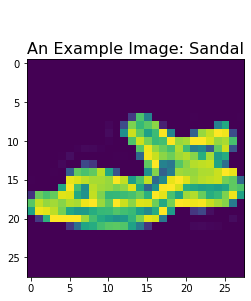

In [23]:
random = random.randint(0, len(x_test) - 1)
show(random, 'An Example Image: {}'.format(class_names[y_test[random]]))